In [69]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("../../Model/cleaned_dataset.csv")
backup_data = pd.read_csv("../../Model/cleaned_dataset.csv")

In [70]:
data

,Price,Manufacturer,Model,Horse Power,Mileage,Transmission,Fuel,Posting Month,Posting Year,Age,country_of_origin,price_per_km,price_per_horsepower
0,75000.0,INFINITI,EX35,20.0,143000.0,Automatic,Essence,November,2023,15,Japan,0.524476,3750.000000
1,69000.0,IVECO,DAILY,11.0,87000.0,Manual,Diesel,November,2023,8,Italy,0.793103,6272.727273
2,62000.0,VOLVO,XC60,13.0,190000.0,Automatic,Essence,November,2023,13,Sweden,0.326316,4769.230769
3,69000.0,AC,SEVEN,7.0,59000.0,Automatic,Essence,November,2023,4,United Kingdom,1.169492,9857.142857
4,29000.0,LANCIA,YPSILON,4.0,125000.0,Manual,Essence,November,2023,10,Italy,0.232000,7250.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5123,250000.0,MERCEDES,E BUSINESS,9.0,7000.0,Automatic,Essence,January,2024,1,Germany,35.714286,27777.777778
5124,175000.0,MERCEDES,GLA AMG,8.0,25000.0,Automatic,Essence,January,2024,3,Germany,7.000000,21875.000000
5125,78000.0,MERCEDES,CLA 180,7.0,93000.0,Automatic,Essence,January,2024,10,Germany,0.838710,11142.857143
5126,68000.0,MERCEDES,A,6.0,184600.0,Automatic,Essence,January,2024,9,Germany,0.368364,11333.333333


In [71]:
data.drop(columns=['Posting Month'])
X = data.drop(columns=['Price','Posting Month'])  
y = data['Price']

In [72]:
X.shape, y.shape

((5128, 11), (5128,))

In [73]:
categorical_columns = ['Manufacturer', 'Model', 'Transmission', 'Fuel', 'country_of_origin']
numerical_columns = ['Horse Power', 'Mileage', 'Posting Year', 'Age', 'price_per_km', 'price_per_horsepower']

In [74]:
ct = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), categorical_columns),  # Encode categorical features
    ],
    remainder='passthrough'  # Pass numerical features as-is
)

In [75]:
X_encoded = ct.fit_transform(X)

In [76]:
encoded_feature_names = (
    ct.named_transformers_['cat'].get_feature_names_out(categorical_columns).tolist()
    + numerical_columns
)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 0)

In [78]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4102, 805), (1026, 805), (4102,), (1026,))

------------------------------------------------------------------------------

----------------------------------RL--------------------------------------------

In [79]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [80]:
y_test.shape

(1026,)

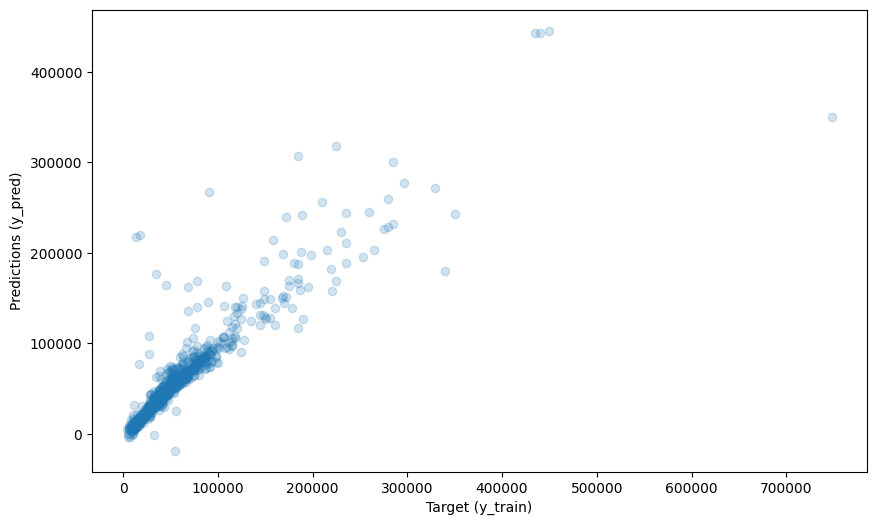

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.2)  
plt.xlabel('Target (y_train)') 
plt.ylabel('Predictions (y_pred)')
plt.show()

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


mae_new = mean_absolute_error(y_test, y_pred)
mse_new = mean_squared_error(y_test, y_pred)
r2_new = r2_score(y_test, y_pred)

print(f"MAE après suppression: {mae_new}")
print(f"MSE après suppression: {mse_new}")
print(f"R² après suppression: {r2_new}")

MAE après suppression: 7885.266277576898
MSE après suppression: 516594633.0332524
R² après suppression: 0.8280062364623377
